# Exploratory Data Analysis - Eksploracyjna analiza danych

## Importy

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


## Ładowanie danych

In [16]:
pd.set_option("display.max_columns", None) # Pełna szerokość kolumn
df = pd.read_csv("../data/raw.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Czy dane zbalansowane?

In [18]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Czyszczenie danych

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") # Coerce - jeśli trafi na wartość, której nie da się zamienić na liczbę, zamienia ją na Nan
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df = df.dropna() # Usuwa wiersze, które zawirają co najmniej jedną brakującą wartość

## Rozkład cech numerycznych

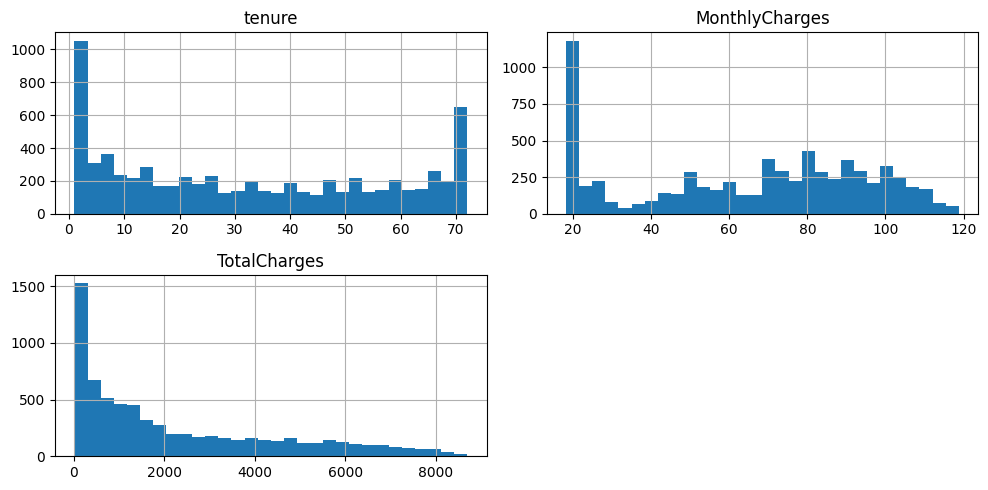

In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"] # Lista kolumn numercznych

df[num_cols].hist(bins=30, figsize=(10,5)) # Bins - dzieli dane na 30 przedziałów, rozmiar całej figury
plt.tight_layout() # Automatycznie dopasowuje odstępy
plt.show()

## Churn vs Contract

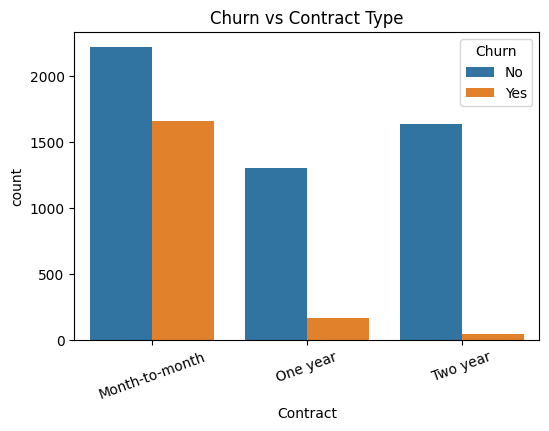

In [ ]:
plt.figure(figsize=(6,4)) # Szerokość-6, wysokość-4
sns.countplot(data=df, x="Contract", hue="Churn") # oś X = typ umowy (np. Month-to-month, One year, Two year) 
# hue="Churn' rozbicie słupków na klientów, którzy odeszli vs nie odeszli
plt.xticks(rotation=20)
plt.title("Churn vs Contract Type")
plt.show()

## Churn vs Tenure

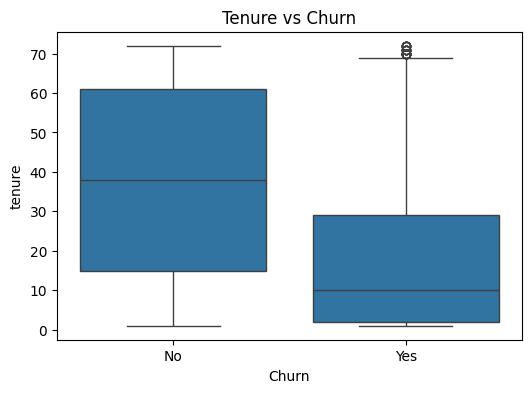

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()

## Korelacje

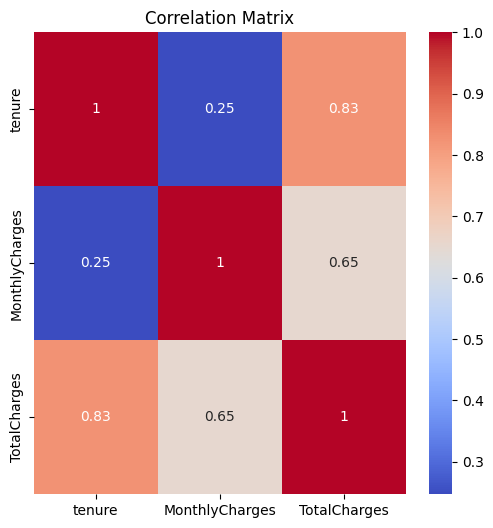

In [27]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()